In [1]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/FL/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 177 images belonging to 3 classes.


In [5]:
# Tạo bộ dữ liệu test
test_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/FL/Test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 18 images belonging to 3 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [7]:
# Các nhãn có trong bộ dữ liệu test
test_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [8]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(177, 224, 224, 3)
(177, 3)


In [9]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(18, 224, 224, 3)
(18, 3)


In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(2048, activation = "relu", input_shape = (224*224*3,)))
model.add(layers.Dense(2048, activation= "relu"))
model.add(layers.Dense(3, activation= "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2048)              308283392 
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_5 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 312,485,891
Trainable params: 312,485,891
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_train = x_train.reshape((177,224*224*3))
x_test = x_test.reshape((18,224*224*3))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
x_train.shape

(177, 150528)

In [20]:
y_train.shape

(177, 3)

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 32s 5s/step - loss: 8.5370 - accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 22s 4s/step - loss: 1.3974 - accuracy: 0.3503
Epoch 3/100
6/6 [==============================] - 23s 4s/step - loss: 1.1225 - accuracy: 0.3616
Epoch 4/100
6/6 [==============================] - 22s 4s/step - loss: 1.1120 - accuracy: 0.3390
Epoch 5/100
6/6 [==============================] - 22s 4s/step - loss: 1.1028 - accuracy: 0.3785
Epoch 6/100
6/6 [==============================] - 22s 4s/step - loss: 1.1500 - accuracy: 0.4350
Epoch 7/100
6/6 [==============================] - 22s 4s/step - loss: 1.1143 - accuracy: 0.4237
Epoch 8/100
6/6 [==============================] - 22s 4s/step - loss: 1.1199 - accuracy: 0.4237
Epoch 9/100
6/6 [==============================] - 22s 4s/step - loss: 1.0446 - accuracy: 0.4520
Epoch 10/100
6/6 [==============================] - 22s 4s/step - loss: 1.0305 - accuracy: 0.4915
Epoch 11/100
6/6 [===========

In [21]:
# Lưu lại
model.save("Nhan_dien_hoa.h5")

In [22]:
# Tải mô hình 
model_ANN=load_model('Nhan_dien_hoa.h5')

1/1 [==============================] - 0s 115ms/step
[[0.22577092 0.13515374 0.63907534]]
1/1 [==============================] - 0s 81ms/step
Hoa Lan


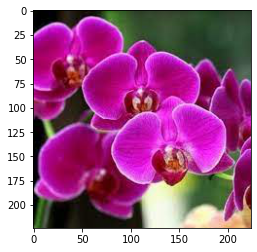

In [23]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
import matplotlib.pyplot as plt

img = load_img('lan (58).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224*224*3)
class_names = ["Cẩm Tú Cầu", "Hoa Cúc", "Hoa Lan"]
print(model_ANN.predict(img))
print(class_names[np.argmax(model_ANN.predict(img))])

1/1 [==============================] - 0s 88ms/step
[[0.27216116 0.4348849  0.292954  ]]
1/1 [==============================] - 0s 93ms/step
Hoa Cúc


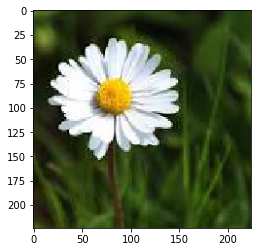

In [47]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('1.jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224*224*3)
class_names = ["Cẩm Tú Cầu", "Hoa Cúc", "Hoa Lan"]
print(model_ANN.predict(img))
print(class_names[np.argmax(model_ANN.predict(img))])

1/1 [==============================] - 0s 104ms/step
[[0.4548485 0.3489955 0.196156 ]]
1/1 [==============================] - 0s 79ms/step
Cẩm Tú Cầu


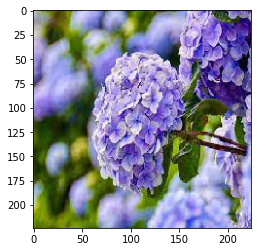

In [36]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('lan (58).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224*224*3)
class_names = ["Cẩm Tú Cầu", "Hoa Cúc", "Hoa Lan"]
print(model_ANN.predict(img))
print(class_names[np.argmax(model_ANN.predict(img))])